In [1]:
!git clone https://github.com/leavin296/dataset_autocar.git

fatal: destination path 'dataset_autocar' already exists and is not an empty directory.


In [14]:
!ls

dataset_autocar  sample_data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
import pickle 
  #Mô-đun Pickle thực hiện các giao thức nhị phân để tuần 
    #tự hóa và khử tuần tự hóa một cấu trúc đối tượng Python
    # đuôi .p là đuôi của file pickle
import pandas as pd
import cv2
from numpy import random

In [16]:
ban_left = np.load('dataset_autocar/banded_turn_left_train.npy')
go_straight = np.load('dataset_autocar/go_straight.npy')
print(ban_left.shape)
print(go_straight.shape)

(108, 32, 32, 3)
(132, 32, 32, 3)


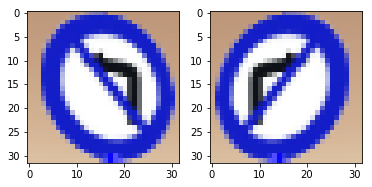

In [28]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(ban_left[30])
axes[1].imshow(cv2.flip(ban_left[30], 1))

In [31]:
ban_right = np.array(list(map(lambda x: cv2.flip(x, 1), ban_left)))
print(ban_right.shape)

(108, 32, 32, 3)


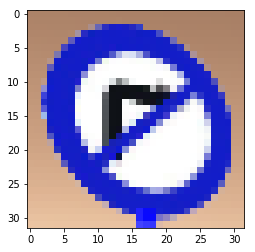

In [32]:
plt.imshow(ban_right[10])

In [48]:
X_train = np.concatenate((ban_left, ban_right, go_straight), axis = 0)
y_train = np.concatenate((np.ones(ban_left.shape[0])*0, np.ones(ban_right.shape[0])*1, np.ones(go_straight.shape[0])*2), axis = 0)
y_train = y_train.astype(int)
print(X_train.shape)
print(y_train.shape)

(348, 32, 32, 3)
(348,)


In [0]:
np.random.seed(0)

In [0]:
assert(X_train.shape[0] == y_train.shape[0]), 'number of images is not equal number of images labels'
#assert(X_val.shape[0] == y_val.shape[0]), 'number of images is not equal number of images labels'
#assert(X_test.shape[0] == y_test.shape[0]), 'number of images is not equal number of images labels'
#assert(X_train.shape[1:] == X_val.shape[1:] == X_test.shape[1:] == (32,32,3)), 'number of dimensions is not eaual (32,32,3)'
assert(X_train.shape[1:] == (32,32,3))

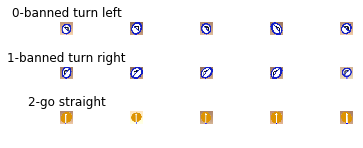

In [52]:
#data = pd.read_csv('german-traffic-signs/signnames.csv')
data = [[0, 'banned turn left'],[1, 'banned turn right'], [2, 'go straight']]

num_of_samples = []
cols = 5
num_classes = 3

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,2))
    # figsize là độ dài (inchs) hoành và tung của khung ảnh chứa các subplot
fig.tight_layout()    
    # tự động điều chỉnh các tham số subplot sao cho (các) subplot phù hợp với khu vực hình. 
    # Đây là một tính năng thử nghiệm và có thể không hoạt động trong một số trường hợp
for col in range(cols):
    for row, sign_name in data:
        x_selected = X_train[y_train == row]
        axs[row][col].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap = plt.get_cmap('gray'))
            # cmap ~ color map
            # chọn ngẫu nhiên mỗi tấm ảnh tương ứng với phân lớp
            # chạy khá lâu vì phải duyệt liên tục, bị lặp lại
        axs[row][col].axis('off')
        if col == 0:
            axs[row][col].set_title(str(row) + '-' + sign_name)
                # tạo nhãn cho ảnh ở giữa, cột thứ 2
                # signame là có type là Series, một Series ngang ko phải dọc !
            num_of_samples.append(len(x_selected))

In [53]:
print(data)

[[0, 'banned turn left'], [1, 'banned turn right'], [2, 'go straight']]


[108, 108, 132]


Text(0, 0.5, 'Number of images')

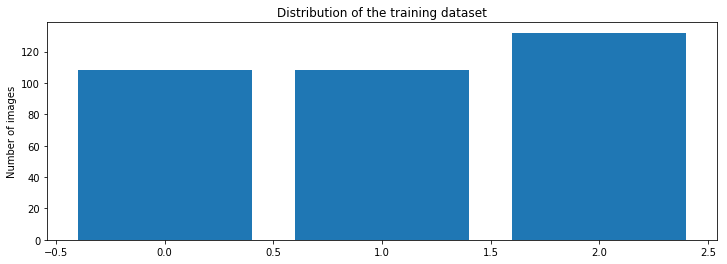

In [54]:
print(num_of_samples)
plt.figure(figsize = (12,4))
    # figsize tạo độ dài inches cho trục hoành và tung
plt.bar(range(0,num_classes), num_of_samples)
    # khác histogram sẽ lấy số điểm trong một bin để tạo giá trị cho trục y
    # bin là số khoảng đều nhau của trục hoành
plt.title('Distribution of the training dataset')
plt.ylabel('Number of images')

In [0]:
#@title Default title text
# PREPROCESSING IMAGE - TIỀN XỬ LÝ ẢNH 

# Chuyển sang gray đưa về 1 channel, vì màu sắc không phải là đặc trưng
  # phân biệt với các các biển báo khác
# Vấn đề đặc trưng của biển báo là cạnh, độ cong của khối hình

# Dùng histogram để rải đều độ sáng của ảnh, vì có nhiều ảnh quá sáng hoặc
  # quá tối, những tấm ảnh sau khi qua bộ lọc histogram sẽ cho ra độ sáng giống
  # giống nhau, cho ra ảnh có contrast (độ tương phản) cao hơn giúp trích xuất
  # tính năng tốt hơn

import cv2
def gray_scale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(-0.5, 31.5, 31.5, -0.5)

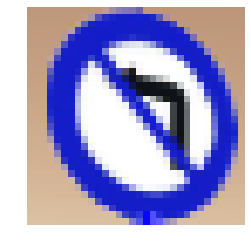

In [56]:
sign = X_train[30]
plt.imshow(sign)
plt.axis('off')


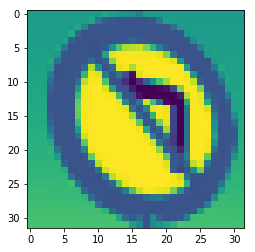

(0.0, 1.0, 0.0, 1.0)

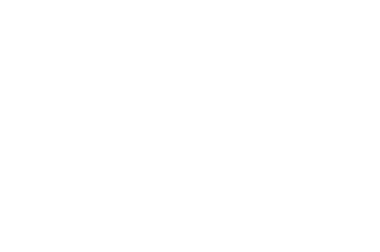

In [57]:
gray_sign = gray_scale(sign)
plt.imshow(gray_sign)
plt.show()
plt.axis('off')

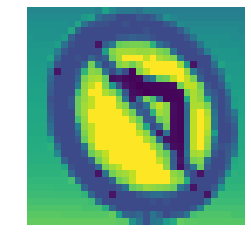

In [58]:
# Hàm cân bằng (equalizer function) histogram chỉ chấp nhận ảnh grayscale !!!
  # ảnh 1 kênh
def equalize(img):
  return cv2.equalizeHist(img)

hist_sign = equalize(gray_sign)
plt.imshow(hist_sign)
plt.axis('off')
plt.show()


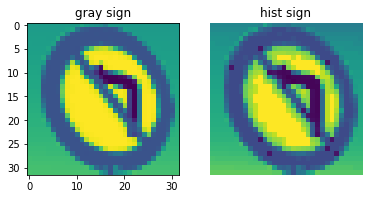

In [59]:
fig, axes = plt.subplots(1,2)
axes[0].set_title('gray sign')
axes[0].imshow(gray_sign)
axes[1].set_title('hist sign')
axes[1].imshow(hist_sign)

plt.axis('off')
plt.show()

In [0]:
# Có 3 công nghệ trong tiền xử lý ảnh cho bài ví dụ này:
  # 1 grayscale
  # 2 histogram equalization
  # 3 normalization chuẩn hóa về 0 -> 1
    # vì mỗi neural sẽ nhân với trọng số và tạo ra các số rất lớn, ngốn thêm sức mạnh xử lý của cpu
def preprocessingimage(img):
  img = gray_scale(img)
  img = equalize(img)
  img = img/225
  return img

In [0]:
# map có hai đối số
  # đầu tiên là hàm, thứ hai là một iterrowable

# Xử lý toàn bộ dữ liệu ảnh
X_train = np.array(list(map(preprocessingimage, X_train)))
  # toàn bộ ảnh sẽ đưa vào thư viện xử lý số numpy
#X_val = np.array(list(map(preprocessingimage, X_val)))
#X_test = np.array(list(map(preprocessingimage, X_test)))

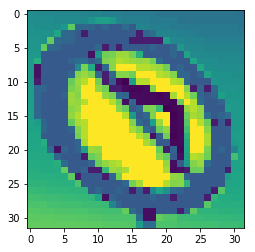

(0.0, 1.0, 0.0, 1.0)

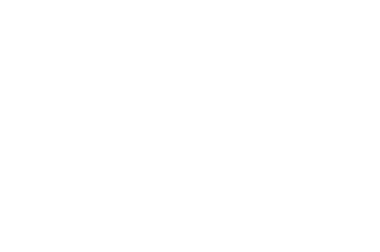

In [62]:
plt.imshow(X_train[random.randint(0, len(X_train)-1)])
plt.show()
plt.axis('off')

In [0]:
X_train = X_train.reshape(len(X_train), 32, 32, 1)
#X_val = X_val.reshape(len(X_val), 32, 32, 1)
#X_test = X_test.reshape(len(X_test), 32, 32, 1)
  # Mục đích của việc reshape thêm 1 ở đối số cuối
    # để đưa các giá trị trong mặt phẳng 2 chiều về 1 giá trị đơn lẻ
    # mỗi giá trị sẽ nằm trong một ngoặc []
    # vì đây là định dạng đầu vào của neural network trong keras
    
    # VD: [[[12  2]
    #       [ 1  4]
    #       [23  5]]

    #      [[ 2  3]
    #       [ 6  3]
    #       [ 2  3]]]
    
    # (2,3,2) -> (2,3,2,1)
    # [[[[12]
    #   [ 2]]

    #   [[ 1]
    #   [ 4]]

    #   [[23]
    #   [ 5]]]


    #   [[[ 2]
    #   [ 3]]

    #   [[ 6]
    #   [ 3]]

    #   [[ 2]
    #  [ 3]]]]
    

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# Tạo 5 bộ chuyển đổi để bổ sung đầy đủ đa dạng dữ liệu sẽ cho phép
# quá trình training hiệu quả hơn
datagen = ImageDataGenerator(width_shift_range = 0.1, # dịch sang phải 10 %, dịch trái 10% là -0.1
                  height_shift_range = 0.1, # dịch lên 10% 
                  zoom_range = 0.2, # phóng to ảnh lên 1.2, min = 1-, max = 1+
                  shear_range = 0.1, # làm nghiêng ảnh
                  rotation_range = 10) # xoay ảnh 10 độ
datagen.fit(X_train)
 

(32, 32, 1)


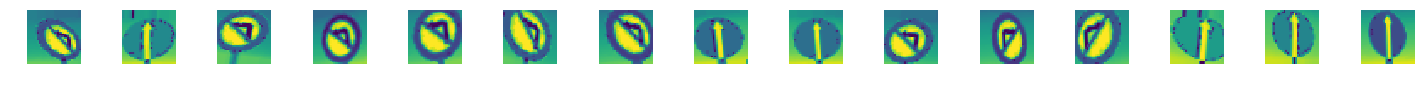

In [65]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
 # batchsize = 20 tức nó sẽ lấy lần lượt 20 mẫu trong tổng số mẫu cần train để generator, mục đích giúp tiết kiệm bộ nhớ hiệu quả
X_batch, y_batch = next(batches)
  # X_batch thứ i có shape giống với mẫu đầu vào là 32,32,1 nên cần reshape lại để imshow
  # next sẽ lặp qua lần lượt 20 mẫu 
fig, axs = plt.subplots(1, 15, figsize = (20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32))
  axs[i].axis('off')
print(X_batch[0].shape)

In [66]:
print(X_train.shape)
#print(X_val.shape)
#print(X_test.shape)
#print(y_val.shape)
print(y_train[0])

(348, 32, 32, 1)
0


In [0]:
# one hot coding
y_train = to_categorical(y_train, 3)
#y_val = to_categorical(y_val, 2)
#y_test = to_categorical(y_test, 2)

In [0]:
def LeNetModel():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape = (32, 32, 1), activation = 'relu', strides = 1, padding = 'valid'))
  #model.add(Conv2D(40, (5,5), activation = 'relu'))
    # thêm layer Conv2D để lấy được nhiều góc cạnh 
    # tăng số feature để tăng độ chính xác
  model.add(MaxPooling2D(pool_size = (2,2)))
  #model.add(Dropout(0.5))
    # dùng Drop out ở giữa 2 layer có nhiều trọng số
      # drop out nên để sau maxpooling và dense
    # THÊM DROPOUT Ở ĐÂY HIỆU SUẤT KÉM HƠN 1 CHÚT
  #model.add(Conv2D(30, (3,3), activation = 'relu'))
  model.add(Conv2D(15, (3,3), activation = 'relu'))
    # thêm layer Conv2D để lấy được nhiều góc cạnh 
    # tăng số feature để tăng độ chính xác
  model.add(MaxPooling2D(pool_size = (2,2)))
  #model.add(Dropout(0.5))
    # dùng Drop out ở giữa 2 layer có nhiều trọng số
      # drop out nên để sau maxpooling và dense
    # DROP OUT THƯỜNG CHẶN 2 ĐẦU LAYER CÓ NHIỀU TRỌNG SỐ NHẤT
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
    # dùng Drop out ở giữa 2 layer có nhiều trọng số
      # drop out nên để sau maxpooling và dense
    # DROP OUT THƯỜNG CHẶN 2 ĐẦU LAYER CÓ NHIỀU TRỌNG SỐ NHẤT
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    # learning rate = 0.01 là quá cao, vì khi trọng số trừ đi một lượng delta để cải thiện hiệu suất mà trừ quá đà thì độ chính xác sẽ ko cao
    # nếu để lr nhỏ hơn nữa, độ lệch cho trọng số giảm nhẹ hơn, kiểm soát tốt hơn
  return model

In [70]:
model = LeNetModel()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)      

In [71]:
#h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 15), steps_per_epoch = 60, epochs = 50, validation_data = (X_val, y_val), shuffle = 1, verbose = 1)
  # steps_per_epoch = ceil(num_samples / batch_size), num_samples ở đây cỡ 34000, nhưng ở đây ko hiểu vì sao mẫu tới 100000
  # dùng bộ dữ liệu tăng cường sẽ cho kết quả cao hơn !!!
  
h = model.fit(x = X_train, y = y_train, validation_split = 0.2, epochs = 10, shuffle = 'True', batch_size = 8, verbose = 1)
  # batchsize = 400, ứng với 1 epoch sẽ lặp qua lần lượt 400 mẫu cho đến hết, giúp tiết kiệm bộ nhớ
  # 1 epoch là 1 lần truyền tới và lui
  #validation đã có bộ xác nhận riêng, nén sẽ dùng data có sẵn, không dùng split

Instructions for updating:
Use tf.cast instead.
Train on 278 samples, validate on 70 samples
Epoch 1/10
278/278 [==============================] - 6s 20ms/step - loss: 0.4607 - acc: 0.8417 - val_loss: 0.0553 - val_acc: 1.0000
Epoch 2/10
278/278 [==============================] - 0s 597us/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 3/10
278/278 [==============================] - 0s 626us/step - loss: 8.4958e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 4/10
278/278 [==============================] - 0s 597us/step - loss: 3.9059e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 5/10
278/278 [==============================] - 0s 577us/step - loss: 3.0794e-04 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 6/10
278/278 [==============================] - 0s 586us/step - loss: 1.6081e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000
Epoch 7/10
278/278 [==============================] - 0s 583us/step - loss: 3.7788e-04 -

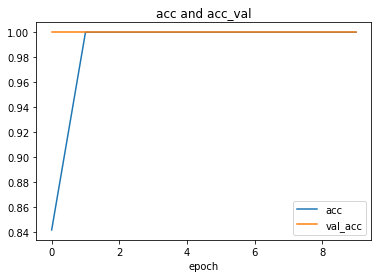

In [72]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title('acc and acc_val')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'])
plt.show()
  # theo kinh nghiệm val > train và 2 đường có xu hướng tiệm cận nhau
  # nếu val > train mà khoảng cách 2 đường quá lớn vì có nhiều lớp drop_out trong mô hình !!!

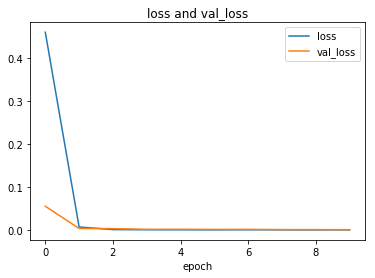

In [73]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('loss and val_loss')
plt.legend(['loss', 'val_loss'])
plt.xlabel('epoch')
plt.show()
# theo kinh nghiệm val < train và 2 đường có xu hướng tiệm cận nhau
# nếu val > train mà khoảng cách 2 đường quá lớn vì có nhiều lớp drop_out trong mô hình !!!

In [0]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('loss is: ', score[0])
print('accuracy is: ', score[1])

loss is:  4.209750223556815e-05
accuracy is:  1.0


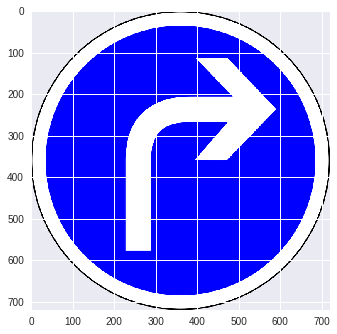

In [0]:
#fetch image

import requests
from PIL import Image
url = 'https://cdn.pixabay.com/photo/2013/07/13/13/16/traffic-sign-160709_960_720.png'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


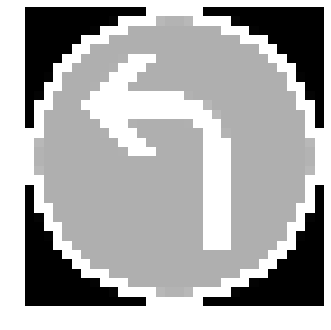

In [0]:
# Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = cv2.flip(img, 1)
img = preprocessingimage(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.axis('off')
print(img.shape)

In [0]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

In [0]:
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]


In [74]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('model_autocar.h5')    
model_file = drive.CreateFile({'title' : 'model_autocar.h5'})
model_file.SetContentFile('model_autocar.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

    100% |████████████████████████████████| 993kB 22.3MB/s 


GoogleDriveFile({'id': '1OhohChqPYK_RE4McnsgUmYkI5Q6ZiAoL'})

In [0]:
files.download('model.h5')

In [0]:
# Công nghệ giúp cải thiện độ chính xác, (Data Augmentation ~ Tăng cường dữ liệu)
  # rotate ảnh
  # zoom ảnh
  # vừa rotate vừa zoom ảnh
  # => điều này cho phép trích xuất các tính năng liên quan chính xác hơn
       # 